# Assignment: Bike sharing
### by Saunak Mallik - ML-C64 [Module: Multiple Linear Regression]
### Date: 30-JUL-2024
#### Git Hub link: https://github.com/saunakmallik2502/Linear-Regression/

#### `Objective`: build a multiple linear regression model for the `prediction` of `demand for shared bikes`.
- Which variables are significant in predicting the demand for shared bikes
- How well those variables describe the bike demand

#### `Approach to model building`:
- `Approach 1 (Section 1 - Section 6)`: Build the model using __`sklearn.RFE`__ to find the significant features, use __`statsmodels-OLS`__ `p-value` & `VIF` to eliminate the features one by one.
- `Approach 2 (Section 7)`: Build the model using __`sklearn`__ only. 
- Note: Section 1 - 4 is common for both approaches.

# 🪧🧱 Section 1: Importing and Data Understanding 🧱

In [1]:
# import essential libraries

# Numerical and Data analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra - To suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Building a Linear Model
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# statemodels api
import statsmodels.api as sm

In [2]:
# import dataset
df = pd.read_csv('day.csv')

In [3]:
df.shape

(730, 16)

In [4]:
df.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# 🪧🧱 Section 2: Data pre-processing and visualization 🧱
- `pandas`, `matplotlib` and `seborn` libraries are used for data visualization.

### 📋🛑2.1> Missing value checks
#### Assumptions while taking care of missing values:
- __Any column__ having __high %  (generally >40%) of missing values__ ideally ___should not be considered the part of analysis___, even if it is very relevent column. That's because, the insights coming out from that column might not be reliable.

- Note: Alternatively, we could have used dropna to drop all columns with 100% Null values in one go, but that would have
added one more stage on analysis to remove the 40% - 99% Null values.
        - df = df.dropna(axis=1, how='all') #drop the all the columns which contans only NA

In [7]:
# Check for missing values based on mean > 40% Null values
# df.isnull().sum()

# Calculate the percentage of NULL values in each column
df_isnull = 100 * df.isnull().mean()

# Calculate the columns wirh percentage of NULL values > 40% in each column
df_isnull_gt_40 = df_isnull[df_isnull>40]
df_isnull_gt_40

Series([], dtype: float64)

#### 🪧🪧 Conclusion: No missing values

###  📋🛑2.2a> drop casual and registered as they're not features of the data.

In [8]:
# drop casual and registered as they're not features of the data
df.drop(['casual'], axis=1, inplace=True)
df.drop(['registered'], axis=1, inplace=True)

###  📋🛑2.2b> drop `instant` and `dteday` as this is a unique ID column and it's not a feature of the dataset

In [9]:
df.drop(['instant'], axis=1, inplace=True)
df.drop(['dteday'], axis=1, inplace=True)

###  📋🛑2.3> Convert variables like 'weathersit' and 'season'  into categorical variables 

In [10]:
# Convert variables like 'season' into categorical variable
df['season'] = df['season'].apply(lambda x: 'spring' if x==1 else( 'summer' if x==2 else ('fall' if x==3 else 'winter') ) )
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
# Convert variable like 'weathersit' into categorical variable
df['weathersit'] = df['weathersit'].apply(lambda x: 'clear' if x==1 else( 'Mist' if x==2 else ('Light Snow' if x==3 else 'Heavy Rain') ) )
df['weathersit'].value_counts()

clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [12]:
df['yr'].value_counts()  # No action needed as this categorical variable is already converted into 0 and 1

1    365
0    365
Name: yr, dtype: int64

In [13]:
df['season'].value_counts()  # No action needed

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
# Convert variable like 'yr' into categorical variables i.e., the appropriate year
# df['yr'] = df['yr'].apply(lambda x: '2018' if x==0 else '2019')
# df['yr'].value_counts()

### 📋🛑2.4> initial Data visualization of the dataset before Encoding & Dummy variable conversion

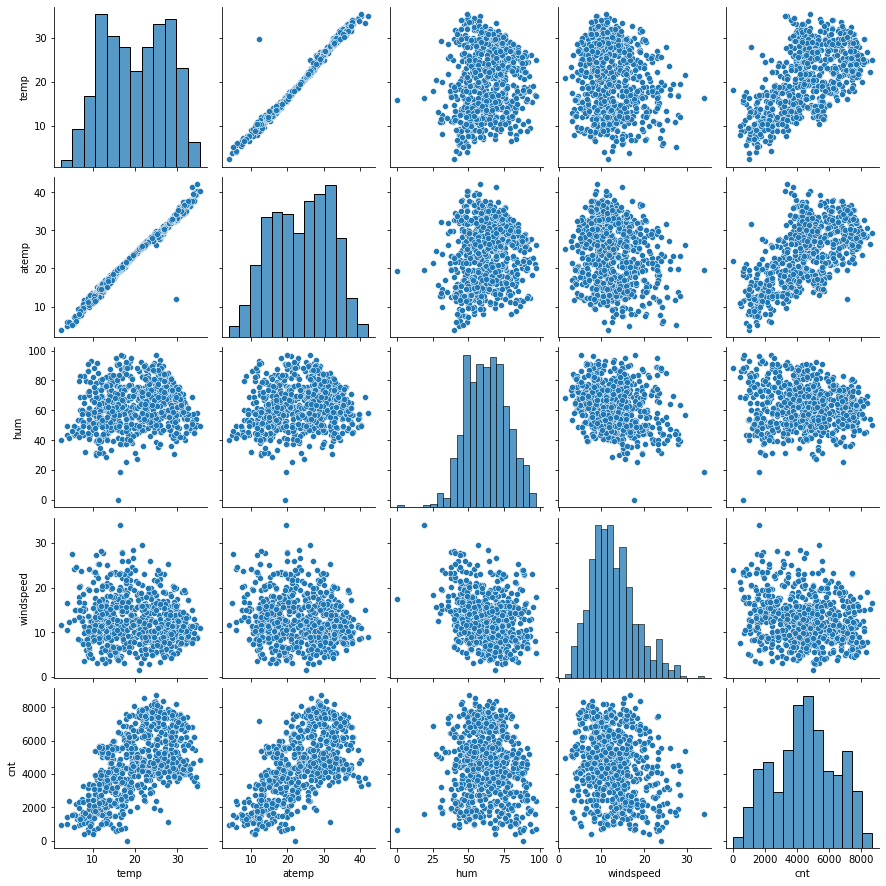

In [15]:
# plot pairplot of all numerical features
num_cols = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(df[num_cols])
plt.show()

# num_cols = ['', '', '', '', '']
# for i in num_cols:
#    sns.histplot(x=df[i])
#    plt.show()

#### 🪧🪧Observations: 
1. Data looks normally distributed along their mean values.
2. At low humidity, not much rides observed.
3. At high and low temp & windspeed, not much rides observed.

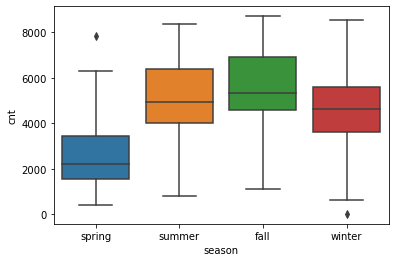

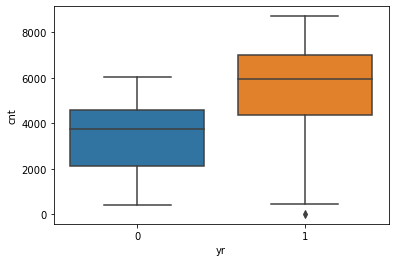

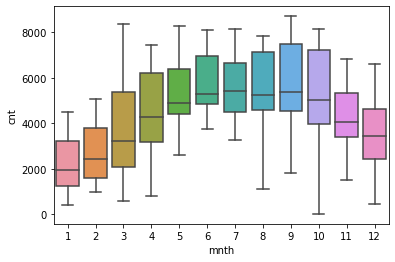

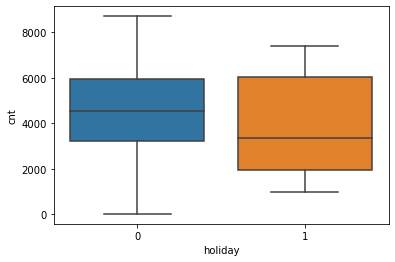

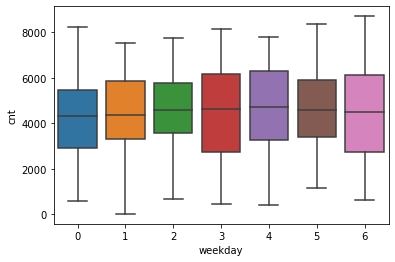

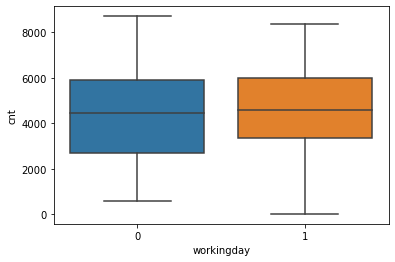

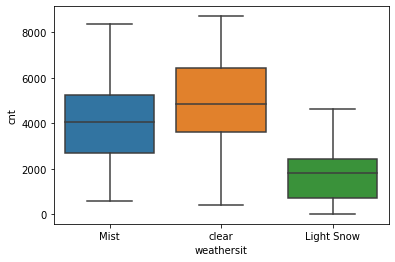

In [16]:
# boxplot of all categorical columns
cat_cols =['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in cat_cols:
    sns.boxplot(x = i, y = 'cnt', data = df)
    plt.show()

#### 🪧🪧Observations: 
1. More rides are observed in summer and fall seasons.
2. The number of rides have increased in 2019 as compared to 2018... looks like this is on a high trend. 
3. Bike sharing is lower in the months of June-Sep months reflecting high holiday season.

###  📋🛑2.5> One-HOT encoding
- Step to perform ONE-HOT ENCODING of the categorical variables with Yes/ No types

In [17]:
# Step to perform ONE-HOT ENCODING of the categorical variables with Yes/ No types

# List of variables to map - NONE here
# varlist = ['']

###  📋🛑2.5> Dummy variables of the categorical variables with > 2 values

- The variable `season` has 4 levels. 
- The variable `weathersit` has 4 levels.
- We need to convert these levels into integer as wellusing `dummy variables`.

In [18]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [19]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'df_additional1'

# Let's drop the first column from status df using 'drop_first = True'
df_additional1 = pd.get_dummies(df['season'], drop_first=True)

# Check what the dataset 'df_additional1' looks like
# df_additional1.head()

# Add the results to the original df dataframe
df = pd.concat([df, df_additional1], axis=1)

In [20]:
df.head(3)  # 3 new variables add

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0


In [21]:
df['weathersit'].value_counts()

clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [22]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'df_additional2'

# Let's drop the first column from status df using 'drop_first = True'
df_additional2 = pd.get_dummies(df['weathersit'], drop_first=True)

# Check what the dataset 'df_additional1' looks like
# df_additional2.head()

# Add the results to the original df dataframe
df = pd.concat([df, df_additional2], axis=1)

In [23]:
df.head(3) # 2 new variables added

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mist,clear
0,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1


In [24]:
# Drop 'season' and 'weathersit' as we have created the dummies for it
df.drop(['season'], axis = 1, inplace = True)
df.drop(['weathersit'], axis = 1, inplace = True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  Mist        730 non-null    uint8  
 14  clear       730 non-null    uint8  
dtypes: float64(4), int64(6), uint8(5)
memory usage: 60.7 KB


In [26]:
# Convert the datatypes of each of the dummy variables to int64
df['spring'] = df['spring'].astype('int64')
df['summer'] = df['summer'].astype('int64')
df['winter'] = df['winter'].astype('int64')
df['Mist'] = df['Mist'].astype('int64')
df['clear'] = df['clear'].astype('int64')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    int64  
 11  summer      730 non-null    int64  
 12  winter      730 non-null    int64  
 13  Mist        730 non-null    int64  
 14  clear       730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


###  📋🛑2.6> FINAL dataset

In [28]:
df.head(3)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mist,clear
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    int64  
 11  summer      730 non-null    int64  
 12  winter      730 non-null    int64  
 13  Mist        730 non-null    int64  
 14  clear       730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


###  📋🛑2.7>  EDA

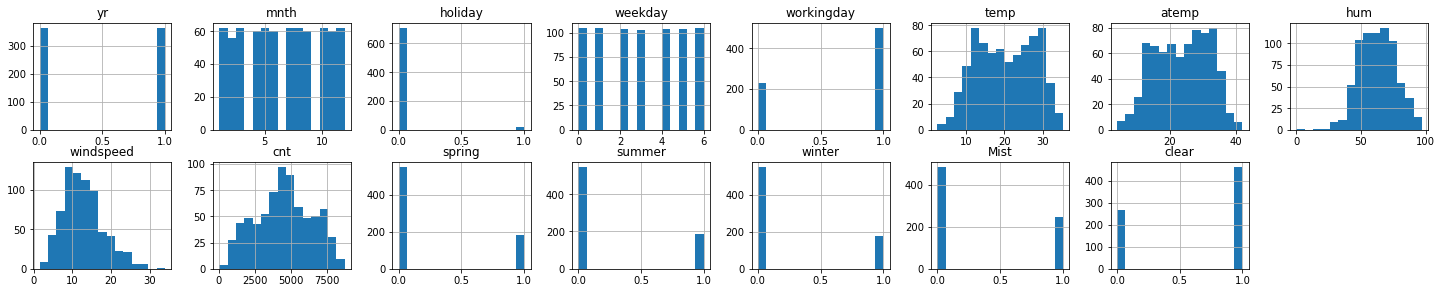

In [30]:
# Univariate analysis

# (I) NUMERICAL COLUMNS. plot the histogram of all numerical columns in the dataset post cleansing

# Approach 1:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols].hist(bins=15, figsize=(25, 25), layout=(10, 8))
plt.show()

# Approach 2:
# num_cols = ['', '', '', '', '']
# for i in num_cols:
#    sns.histplot(x=df[i])
#    plt.show()

In [31]:
# Univariate analysis

# (I) CATEGORICAL COLUMNS. plot the barplot or boxplot of all categorical columns in the dataset post cleansing

# Approach 1:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df)
    plt.show()

# Approach 2:
#cat_cols = ['', '', '', '', '']
#for i in cat_cols:
#    sns.countplot(x=df[i])
#    plt.show()

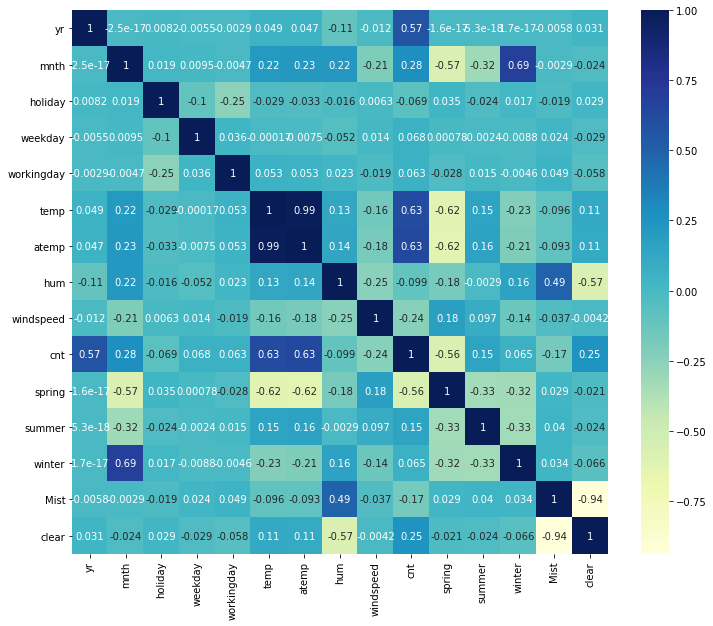

In [32]:
# Multivariate analysis

# plt.plot(figsize=(40,30))
# sns.heatmap(df.corr(), cmap='YlGnBu', annot=True);
# plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='YlGnBu')
plt.show()

In [33]:
df.shape

(730, 15)

In [34]:
df1 = df # create a backup dataframe... just in case needed later
# However, I'll keep working with df only in the next steps

In [35]:
df1.shape

(730, 15)

# 🪧🧱Section 3: Splitting dataset into Train `730, 14` and Test `730,` Sets🧱
- Splitting the dataset into train: test 70:30
- Scaling of Numerical variables

In [36]:
X = df.drop(['cnt'], axis=1)    # X = all feature variables

In [37]:
y = df['cnt']    # y = 1 Target variable

In [38]:
print(X.shape, y.shape)

(730, 14) (730,)


In [39]:
X.head(3)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Mist,clear
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,1,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1,0,0,0,1


In [40]:
y.head(3)

0     985
1     801
2    1349
Name: cnt, dtype: int64

In [41]:
X.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'spring', 'summer', 'winter', 'Mist', 'clear'],
      dtype='object')

In [42]:
y.shape

(730,)

In [43]:
from sklearn.model_selection import train_test_split

### 📋🛑 3.1> train-test split of df in 70:30 ratio

In [44]:
# train-test split of df in 70:30 ratio
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=10)

In [45]:
print(df_train.shape, df_test.shape)

(510, 15) (219, 15)


### __`X.shape: (730, 14)`   &  `y: (730,)`__

### __`df_train.shape: (510, 15)`   &  `df_test.shape: (219, 15)`__

In [46]:
# ------------- Rough-work: start of base model preparation ---------------

In [47]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm

In [48]:
#X_train_sm = sm.add_constant(X_train)

In [49]:
#lm1 = sm.OLS(y_train, X_train_sm)
#lm1 = model1.fit()  # res1 is the result of iteration 1 i.e., model1

In [50]:
#lm1.summary()

In [51]:
# print(X_train.shape, y_train.shape)

In [52]:
#print(X_test.shape, y_test.shape)

In [53]:
# y_train_pred = lm1.predict(X_train_sm)

In [54]:
# ------------- Rough-work: end of base model preparation ---------------

###  📋🛑3.2>  Rescaling the Features
We will use MinMax scaling.

In [55]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mist,clear
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,6.601961,0.033333,3.011765,0.688235,20.067421,23.484339,62.973243,12.658674,4508.443137,0.247059,0.256863,0.260784,0.345098,0.621569
std,0.500429,3.531002,0.179682,1.982204,0.463669,7.304139,7.900320,14.346589,5.279503,1954.658091,0.431725,0.437332,0.439494,0.475867,0.485472
min,0.000000,1.000000,0.000000,0.000000,0.000000,3.993043,5.082900,18.791700,1.500244,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,13.863125,16.889713,52.218725,8.885406,3137.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,19.850847,23.674375,62.916650,12.020772,4497.500000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,26.607298,29.948575,73.473300,15.614266,6028.750000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train[num_vars])
#X_test = scaler.transform(X_test[num_vars])  # As test data is unseen data; hence we can't fit on it, but only transform

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   mnth        730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   hum         730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  spring      730 non-null    int64  
 11  summer      730 non-null    int64  
 12  winter      730 non-null    int64  
 13  Mist        730 non-null    int64  
 14  clear       730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.7 KB


### 📋🛑 3.3> Fit & transform the training dataset

In [75]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'weekday', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head(3)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mist,clear
323,0,0.909091,0,0.000000,0,0.478808,0.480765,0.634717,0.337184,0.372933,0,0,1,1,0
72,0,0.181818,0,0.166667,1,0.298094,0.311594,0.394939,0.236118,0.194978,1,0,0,0,1
510,1,0.363636,0,1.000000,0,0.778657,0.731886,0.695953,0.364071,0.737052,0,1,0,0,1


In [76]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mist,clear
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.509269,0.033333,0.501961,0.688235,0.512980,0.497849,0.564620,0.343339,0.492266,0.247059,0.256863,0.260784,0.345098,0.621569
std,0.500429,0.321000,0.179682,0.330367,0.463669,0.233096,0.213742,0.183343,0.162447,0.235984,0.431725,0.437332,0.439494,0.475867,0.485472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.314983,0.319432,0.427182,0.227237,0.326754,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.506068,0.502990,0.563897,0.323711,0.490945,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.721686,0.672738,0.698806,0.434281,0.675812,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 📋🛑 3.3 Fit & transform the test dataset
- We have not done this now and shall do this later

In [ ]:
# df_test[num_vars] = scaler.transform(df_test[num_vars])

###  📋🛑3.4 >  Dividing into X and Y sets for the model building

In [77]:
y_train = df_train.pop('cnt')
X_train = df_train

In [78]:
# Output of scaling is in an aray
# Hence, we need to put back to df.

In [82]:
X_train.shape

(510, 14)

In [83]:
y_train.shape

(510,)

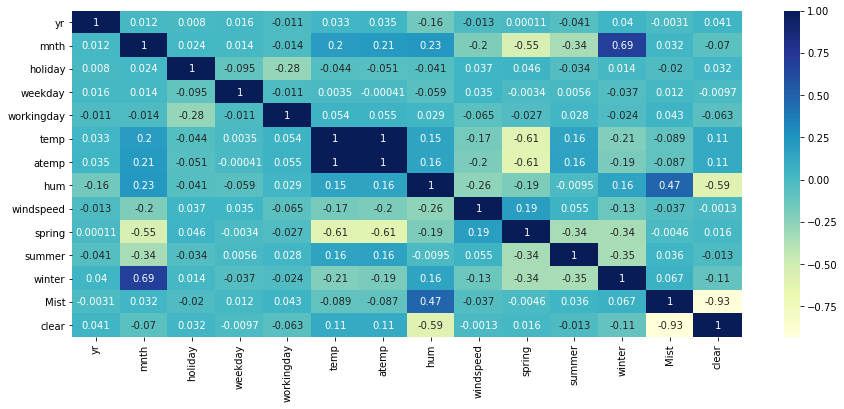

In [90]:
# Check X_train correlation coefficients to check which variables in the training dataset are correlated
plt.figure(figsize = (15, 6))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# 🪧🧱 Section 4: Feature selection RFE & building model recursively 🧱
### I have used `Hybrid method`. 
- Building the Linear Regression model using statesmodels.api with the features selected by RFE algorithm. RFE will do iteration to select the best features out of 19 columns.

- 1. Use RFE to find the significant variables. I've used LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)
- 2. Use statemodel.api to summarize
- 3. Also, find VIF to check if any features are correlated amongst themselves.
- 4. Iterate again after dropping any potential features based on checking the features significance `p-value` and `VIF` of the feature variables.
- 5. Ensure `p-value <0.05` and `VIF<5`.

###  📋🛑4.1> Building our model/ Feature selection using RFE

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [91]:
# df.info()

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [93]:
#estimator = LinearRegression()
#selector = RFE(estimator)  # selecting all features in initial model; selector = RFE(estimator, n_features_to_select=17)
#selector = selector.fit(X_train_df, y_train)  # actual training is done here

In [94]:
# Running RFE to select the best features for initial model; selector = RFE(estimator, n_features_to_select=17)
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)     # instantiate the object
rfe = rfe.fit(X_train, y_train)  # actual training is done here

In [95]:
rfe.support_   # selector.support_

array([ True, False, False, False, False,  True,  True, False,  True,
        True, False, False,  True,  True])

In [106]:
# RFE ranked features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 6),
 ('holiday', False, 3),
 ('weekday', False, 5),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 4),
 ('Mist', True, 1),
 ('clear', True, 1)]

In [108]:
# these are the significant features as per the automated RFE algorithm
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'windspeed', 'spring', 'Mist', 'clear'], dtype='object')

In [109]:
# these columns have been marked by RFE as non-significant
X_train.columns[~rfe.support_]

Index(['mnth', 'holiday', 'weekday', 'workingday', 'hum', 'summer', 'winter'], dtype='object')

###  📋🛑4.2> Iteration 1: Building model using statsmodel, for the detailed statistics

In [110]:
col

Index(['yr', 'temp', 'atemp', 'windspeed', 'spring', 'Mist', 'clear'], dtype='object')

In [111]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [112]:
X_train_rfe.head(3)

,yr,temp,atemp,windspeed,spring,Mist,clear
323,0,0.478808,0.480765,0.337184,0,1,0
72,0,0.298094,0.311594,0.236118,1,0,1
510,1,0.778657,0.731886,0.364071,0,0,1


In [113]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [114]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [115]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     309.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.52e-177
Time:                        20:16:18   Log-Likelihood:                 439.21
No. Observations:                 510   AIC:                            -862.4
Df Residuals:                     502   BIC:                            -828.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0365      0.032      1.127      0.260      -0.027       0.100
yr             0.2590      0.009     28.199      0.000       0.241       0.277
temp          -0.0880      0.240     -0.367      0.714      -0.559       0.383
atemp          0.4943      0.265      1.869      0.062      -0.025       1.014
windspeed     -0.1308      0.031     -4.279      0.000      -0.191      -0.071
spring        -0.1736      0.014    -12.745      0.000      -0.200      -0.147
Mist           0.1701      0.027      6.377      0.000       0.118       0.222
clear          0.2451      0.026      9.318      0.000       0.193       0.297
==============================================================================
Omnibus:                       65.960   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.846
Skew:                          -0.714   Prob(JB):                     1.58e-31
Kurtosis:                       5.153   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion: `temp` and `atemp` are insignificant features (p-value > 0.05) in presence of other variables; can be dropped

###  📋🛑4.3> Iteration 2: Rebuilding the model without `temp` 🧱 

In [116]:
X_train_new = X_train_rfe.drop(['temp', 'atemp'], axis = 1)

In [117]:
X_train_new.columns

Index(['const', 'yr', 'windspeed', 'spring', 'Mist', 'clear'], dtype='object')

In [119]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   
# Print the model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     278.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.75e-142
Time:                        20:21:06   Log-Likelihood:                 351.21
No. Observations:                 510   AIC:                            -690.4
Df Residuals:                     504   BIC:                            -665.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2398      0.033      7.245      0.000       0.175       0.305
yr             0.2631      0.011     24.165      0.000       0.242       0.284
windspeed     -0.1741      0.034     -5.089      0.000      -0.241      -0.107
spring        -0.2926      0.013    -22.848      0.000      -0.318      -0.267
Mist           0.1992      0.031      6.345      0.000       0.137       0.261
clear          0.2931      0.031      9.525      0.000       0.233       0.354
==============================================================================
Omnibus:                       55.061   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.701
Skew:                          -0.613   Prob(JB):                     7.51e-26
Kurtosis:                       4.986   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
X_train_new.columns

Index(['const', 'yr', 'windspeed', 'spring', 'Mist', 'clear'], dtype='object')

In [ ]:
# X_train_new = X_train_new.drop(['const'], axis=1)  # drop the constant, connst ❌❌

In [122]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,37.38
4,Mist,7.60
5,clear,7.60
2,windspeed,1.05
3,spring,1.04
1,yr,1.01


#### 🪧🪧 Conclusion: `const` VIF(37.38) > 5 can be dropped as it correlates high with other feature variables (X's).

###  📋🛑4.4> Iteration 3: __drop `const` VIF > 5 and re-create the model__ 🧱 

In [123]:
X_train_new = X_train_new.drop(["const"], axis = 1)

In [124]:
X_train_new.columns

Index(['yr', 'windspeed', 'spring', 'Mist', 'clear'], dtype='object')

In [125]:
# Iteration 3 of model building here ... (re-use)
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   
# Print the model summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     278.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.75e-142
Time:                        20:32:37   Log-Likelihood:                 351.21
No. Observations:                 510   AIC:                            -690.4
Df Residuals:                     504   BIC:                            -665.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2398      0.033      7.245      0.000       0.175       0.305
yr             0.2631      0.011     24.165      0.000       0.242       0.284
windspeed     -0.1741      0.034     -5.089      0.000      -0.241      -0.107
spring        -0.2926      0.013    -22.848      0.000      -0.318      -0.267
Mist           0.1992      0.031      6.345      0.000       0.137       0.261
clear          0.2931      0.031      9.525      0.000       0.233       0.354
==============================================================================
Omnibus:                       55.061   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.701
Skew:                          -0.613   Prob(JB):                     7.51e-26
Kurtosis:                       4.986   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
# Iteration 3 of VIF computation for the new model here ... (re-use)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.68
4,clear,3.89
3,Mist,2.52
0,yr,2.04
2,spring,1.38


#### 🪧🪧 Conclusion: `hum` can be dropped (VIF of 7.65 > 5) in presence of other variables; can be dropped

In [129]:
X_train_new.columns

Index(['yr', 'windspeed', 'spring', 'Mist', 'clear'], dtype='object')

##  📋🛑4.5> 🧱📋 This is the model based on the training dataset !!

#### `cnt =  0.2398	+ 0.2631*yr  - 0.1741*windspeed + 0.2926*spring + 0.1992*Mist + 0.2931*clear`

#### I have concluded that this is the final model. Below conclusions -
- 1. p-values of all features < 0.05. Hence, they are all significant.
- 2. VIF of all the features < 5. Hence, they do not exhibit significant relationship/ collinearity with other variables.
- 3. __`MODEL Prob(JB): 7.51e-26`__ is very `low`. Hence, the `model can be trusted`.
- 4. __`MODEL R2 is 73.4`, which means `the model can explain 73.4% of the variance of the target variable, cnt`__.

## 📋🛑However, the model has to be tested on the test dataset, while I'll undertake in the subsequent section.

In [132]:
X_train_new.describe()

,yr,windspeed,spring,Mist,clear
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.343339,0.247059,0.345098,0.621569
std,0.500429,0.162447,0.431725,0.475867,0.485472
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.227237,0.000000,0.000000,0.000000
50%,1.000000,0.323711,0.000000,0.000000,1.000000
75%,1.000000,0.434281,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# 🧱 Section 5. Residual Analysis of the train data 🧱

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [133]:
X_train_lm.head(1)

,const,yr,windspeed,spring,Mist,clear
323,1.0,0,0.337184,0,1,0


### 📋🛑 5.1> Plot error terms to check if they are normally distributed

In [146]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

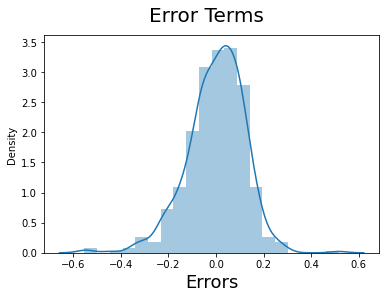

In [147]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'error')

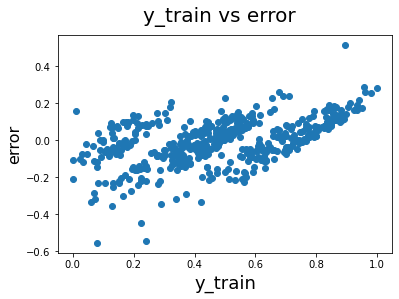

In [148]:
fig = plt.figure()
error =  y_train-y_train_pred
plt.scatter(y_train, error)
fig.suptitle('y_train vs error', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('error', fontsize = 16)     

Text(0, 0.5, 'y_pred')

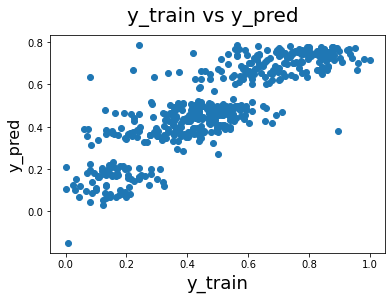

In [152]:
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

# 🧱Section 6: Model Evaluation. evaluation of the model on Test dataset 🧱

### 📋🛑 6.1> Making Predictions

#### Applying the scaling on the test sets

In [149]:
X_train_new.columns

Index(['yr', 'windspeed', 'spring', 'Mist', 'clear'], dtype='object')

In [150]:
num_vars = ['yr', 'windspeed', 'spring', 'Mist', 'clear']

In [138]:
df_test.head(3)

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Mist,clear
566,1,7,0,6,0,24.429153,27.4956,86.5417,14.291100,4459,0,0,0,0,0
374,1,1,0,2,1,12.656536,15.9413,64.6522,12.565984,3598,1,0,0,0,1
181,0,7,0,5,1,29.622500,32.6081,39.6250,6.874736,5362,0,0,0,0,1


In [139]:
df_test[num_vars].head(3)

,yr,windspeed,spring,Mist,clear
566,1,14.291100,0,0,0
374,1,12.565984,1,0,1
181,0,6.874736,0,0,1


In [158]:
X_train_new.columns

Index(['yr', 'windspeed', 'spring', 'Mist', 'clear'], dtype='object')

In [167]:
# Saunak: Transform the non 0/1 type features & non-dumm-encoded features
# num_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
num_vars = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'weekday', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
# df_test[num_vars] = scaler.transform(df_test[num_vars])   # only transform the test dataset; don;t fit_transform

In [191]:
df_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Mist,clear
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.484018,0.485264,0.018265,0.492390,0.671233,0.539054,0.519348,0.553757,0.355143,0.246575,0.242009,0.200913,0.315068,0.666667
std,0.500889,0.296247,0.134214,0.344156,0.470841,0.253913,0.235759,0.176766,0.153340,0.432005,0.429281,0.401601,0.465607,0.472484
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050062,-0.030556,-0.240150,0.041051,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.311439,0.315942,0.420926,0.249358,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.562766,0.556768,0.556975,0.333354,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.727273,0.000000,0.833333,1.000000,0.776477,0.725883,0.681310,0.437853,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.983645,0.950477,0.971686,0.864144,1.000000,1.000000,1.000000,1.000000,1.000000


### 📋🛑 6.2> Dividing into X_test and y_test

In [183]:
df_train.shape

(510, 14)

In [184]:
df_train.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'spring', 'summer', 'winter', 'Mist', 'clear'],
      dtype='object')

In [185]:
df_test.shape

(219, 14)

In [186]:
df_test.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'spring', 'summer', 'winter', 'Mist', 'clear'],
      dtype='object')

In [190]:
df_test

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Mist,clear
566,1,0.545455,0,1.000000,0,0.652175,0.606373,0.865815,0.393568,0,0,0,0,0
374,1,0.000000,0,0.333333,1,0.276477,0.293773,0.586077,0.340487,1,0,0,0,1
181,0,0.545455,0,0.833333,1,0.817910,0.744691,0.266240,0.165370,0,0,0,0,1
529,1,0.454545,0,0.666667,1,0.720868,0.707113,0.487752,0.476922,0,1,0,0,1
233,0,0.636364,0,0.166667,1,0.777567,0.725877,0.360489,0.524373,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,0.545455,0,0.500000,1,0.849531,0.795070,0.567093,0.255099,0,0,0,0,1
621,1,0.727273,0,0.833333,1,0.701241,0.666125,0.619275,0.167957,0,0,0,0,1
84,0,0.181818,0,1.000000,0,0.220394,0.210910,0.263578,0.385880,0,1,0,0,1
414,1,0.090909,0,0.000000,0,0.238930,0.222026,0.419062,0.475642,1,0,0,1,0


In [196]:
y_test = df_test.pop('cnt')  # Series
X_test = df_test  # DataFrame

In [201]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [206]:
X_test_new.head(1)

,const,yr,windspeed,spring,Mist,clear
566,1.0,1,0.393568,0,0,0


In [207]:
# Making predictions
y_pred_test = lm.predict(X_test_new)

In [213]:
y_test.head(1)

566    0.486297
Name: cnt, dtype: float64

In [214]:
y_pred_test.head(1)

566    0.434346
dtype: float64

### 📋🛑 6.3> Plot scatterplot to understand the spread

Text(0, 0.5, 'y_pred')

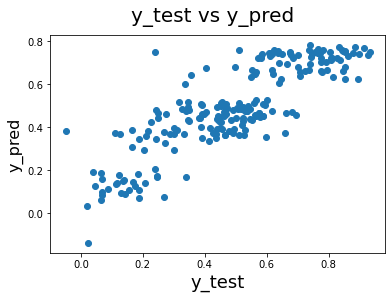

In [218]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred')

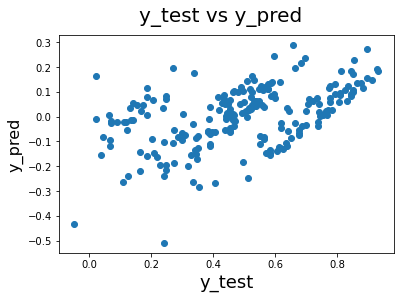

In [219]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
error = y_test - y_pred_test
plt.scatter(y_test,error)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

### 📋🛑 6.4> R Squared Value on Test data

In [221]:
from sklearn.metrics import r2_score

In [225]:
# Finding the model R2-score on the test dataset
r2_score(y_true=y_test, y_pred=y_pred_test)

0.7157196823352809

In [227]:
# The model has R2 of 74.3 on the training dataset and R2 of 71.5 on the test dataset. 
# Hence, the model works well on the test dataset.

# 🧱📋 FINAL CONCLUSIONS: 


## This is the final Linear Regression Model (Line of best-fit) !!

#### `cnt =  0.2398	+ 0.2631*yr  - 0.1741*windspeed + 0.2926*spring + 0.1992*Mist + 0.2931*clear`

#### I have concluded that this is the final model. Below conclusions -
- 1. p-values of all features < 0.05. Hence, they are all significant.
- 2. VIF of all the features < 5. Hence, they do not exhibit significant relationship/ collinearity with other variables.
- 3. __`MODEL Prob(JB): 7.51e-26`__ is very `low`. Hence, the `model can be trusted`.
- 4. __`MODEL R2 is 73.4`, which means `the model can explain 73.4% of the variance of the target variable, cnt`__.
- 5. THe model has been tested with almost simila R2 on the test dataset.

## 📋🛑 `The model has R2 of 74.3 on the training dataset and R2 of 71.5 on the test dataset.  Hence, the model works well on the test dataset` 🛑📋

# 🧱Section 7.[Alternative approach using sklearn only to build the model🧱

We will now build the model using an alternatove approach by using the sklearn library only.

In [228]:
X_train.shape

(510, 14)

In [229]:
y_train.shape

(510,)

In [230]:
from sklearn.linear_model import LinearRegression

In [231]:
lmx = LinearRegression()
lmx.fit(X_train, y_train)

LinearRegression()

In [232]:
lmx.intercept_

0.05199701743115903

In [233]:
lmx.coef_

array([ 0.24902083, -0.02600045, -0.081206  ,  0.0467947 ,  0.00522445,
        0.17903857,  0.32995459, -0.12878761, -0.16192911, -0.11487971,
        0.02091494,  0.08830833,  0.14810529,  0.19907814])

In [234]:
y_train_pred = lmx.predict(X_train) # 4. make predictions (train, test)
y_test_pred = lmx.predict(X_test)

In [235]:
from sklearn.metrics import mean_squared_error, r2_score

In [236]:
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)  # r2 on train dataset  
r2_train

0.8327776505414919

In [237]:
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)  # r2 on test dataset
r2_test

0.8144387705358892

### Model conclusion:
#### - r2 from training dataset is 83.39% and r2 from test dataset is 80.85%. Hence, the model does reasonably well on the testing dataset and doesn't loose much of explainability of variation.

#### - 📋👉 Hence, I conclude that the model is a good one!!

### Check residuals

<AxesSubplot:xlabel='cnt', ylabel='Density'>

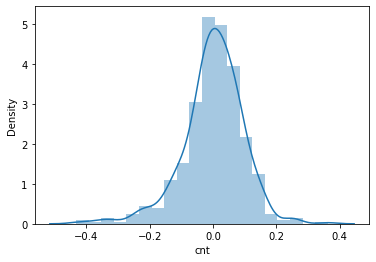

In [238]:
# Validate the residuals from the training dataset to be normally distributed
sns.distplot((y_train - y_train_pred), bins=20)

<AxesSubplot:xlabel='cnt', ylabel='Density'>

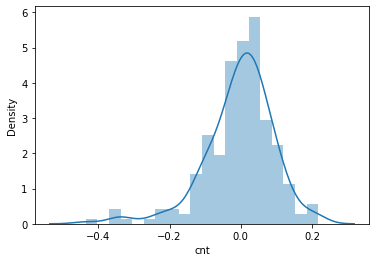

In [239]:
# Validate the residuals from the testing datset to be normally distributed
sns.distplot((y_test - y_test_pred), bins=20)

Text(0, 0.5, 'y_pred')

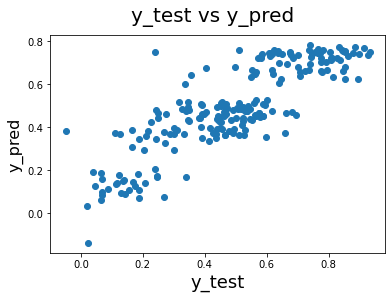

In [240]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

### Conclusion from residuals:
#### - residuals are normally distributed.

#### - 📋👉 Hence, I conclude that the model is a good one!!

# 🧱📋 FINAL CONCLUSIONS: 


## This is the final Linear Regression Model (Line of best-fit) !!

#### `cnt =  0.2398	+ 0.2631*yr  - 0.1741*windspeed + 0.2926*spring + 0.1992*Mist + 0.2931*clear`

#### I have concluded that this is the final model. Below conclusions -
- 1. p-values of all features < 0.05. Hence, they are all significant.
- 2. VIF of all the features < 5. Hence, they do not exhibit significant relationship/ collinearity with other variables.
- 3. __`MODEL Prob(JB): 7.51e-26`__ is very `low`. Hence, the `model can be trusted`.
- 4. __`MODEL R2 is 73.4`, which means `the model can explain 73.4% of the variance of the target variable, cnt`__.

## 📋🛑 `The model has R2 of 74.3 on the training dataset and R2 of 71.5 on the test dataset.  Hence, the model works well on the test dataset and hence is RELIABLE!!` 🛑📋

## `The alternative modeling performed sklearn also has a high model accuracy of 83% on the training dataset and 81% on the test dataset. So, I can conclude that the model works well to predict any new data and hence is RELIABLE!!  